# Simple Neural Network

<center> <img  src="simple_NN.PNG" width="400" />   <center/>  

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-09-13 15:21:35.851149: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 15:21:35.914490: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 15:21:35.915839: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 15:21:36.949601: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Dataset

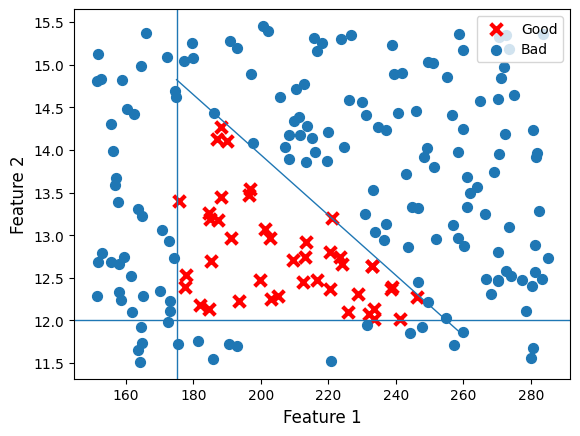

In [2]:
rng = np.random.default_rng(2)
X = rng.random(400).reshape(-1, 2)
X[:, 1] = X[:, 1] * 4 + 11.5
X[:, 0] = X[:, 0] * (285-150) + 150
Y = np.zeros(len(X))

i = 0
for t, d in X:
    y = -3/(260-175)*t + 21
    if (t > 175 and t < 260 and d > 12 and d < 15 and d <= y):
        Y[i] = 1
    else:
        Y[i] = 0
    i += 1

plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=70, marker='x',
            linewidth=3,  c='red', label="Good")
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, marker='o', label="Bad")

tr = np.linspace(175, 260, 50)
plt.plot(tr, (-3 / 85) * tr + 21, linewidth=1)
plt.axhline(y=12, linewidth=1)
plt.axvline(x=175, linewidth=1)

plt.xlabel("Feature 1", size=12)
plt.ylabel("Feature 2", size=12)
plt.legend(loc='upper right')
plt.show()

### Normalize the Data

In [3]:
Y = Y.reshape(-1, 1)
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)
Xt = np.tile(Xn, (1000, 1))
Yt = np.tile(Y, (1000, 1))

# Using Tensorflow

### Setting the Pipeline

In [4]:
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name='layer1'),
        Dense(1, activation='sigmoid', name='layer2')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Random Initial Weights

In [5]:
W1, b1 = model.get_layer("layer1").get_weights()        # Random Generation
W2, b2 = model.get_layer("layer2").get_weights()        # Random Generation
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-0.8105712  -0.77927566 -0.25382632]
 [-0.2513457  -0.3178      0.22949553]] 
b1: [0. 0. 0.]
W2:
 [[ 0.01776159]
 [-0.8279239 ]
 [-0.92827415]] 
b2: [0.]


### Fitting the model

In [6]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt, Yt,
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 10s 1ms/step - loss: 0.1730
Epoch 2/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0816
Epoch 3/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0223
Epoch 4/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.0128
Epoch 5/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0085
Epoch 6/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0059
Epoch 7/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0041
Epoch 8/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0028
Epoch 9/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0020
Epoch 10/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0014


### Final Weights

In [7]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[  0.20496313 -10.98281     14.467144  ]
 [ 10.556479    -0.24305199  12.114978  ]] 
b1: [ 12.7054825 -11.925868    1.9417061]
W2:
 [[ 46.250183]
 [-56.52446 ]
 [-48.192947]] 
b2: [-14.324126]


### Predictions

7/7 [==============================] - 0s 1ms/step


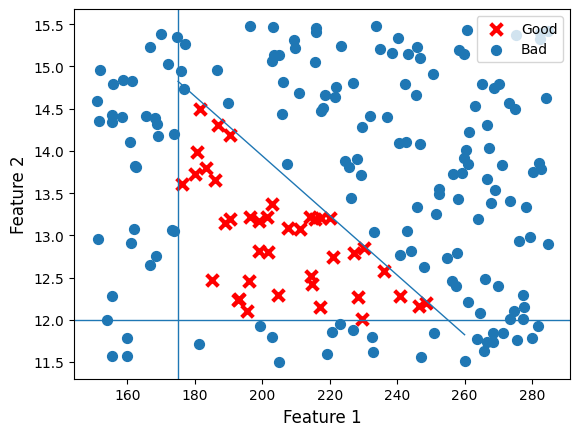

In [8]:
rng = np.random.default_rng(0)
X = rng.random(400).reshape(-1, 2)
X[:, 1] = X[:, 1] * 4 + 11.5
X[:, 0] = X[:, 0] * (285-150) + 150
Y = np.zeros(len(X))

i = 0
for t, d in X:
    y = -3/(260-175)*t + 21
    if (t > 180 and t < 260 and d > 12 and d < 15 and d <= y):
        Y[i] = 1
    else:
        Y[i] = 0
    i += 1

X_testn = norm_l(X)
predictions = model.predict(X_testn)

predictions_thresholded = (predictions > 0.5).astype(int).reshape(-1,)

plt.scatter(X[predictions_thresholded == 1, 0], X[predictions_thresholded == 1, 1], s=70, marker='x',
            linewidth=3,  c='red', label="Good")
plt.scatter(X[predictions_thresholded == 0, 0],
            X[predictions_thresholded == 0, 1], s=50, marker='o', label="Bad")

tr = np.linspace(175, 260, 50)
plt.plot(tr, (-3 / 85) * tr + 21, linewidth=1)
plt.axhline(y=12, linewidth=1)
plt.axvline(x=175, linewidth=1)

plt.xlabel("Feature 1", size=12)
plt.ylabel("Feature 2", size=12)
plt.legend(loc='upper right')

plt.show()

# Using Numpy

### Setting the Pipeline

In [9]:
def my_dense(a_in, W, b):
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:, j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = 1/(1+np.exp(-z))
    return (a_out)

def my_dense(a_in, W, b):
    a_out=1/(1+(np.exp(-(np.matmul(a_in,W)+b))))
    return (a_out)

In [10]:
def my_sequential(x, W1, b1, W2, b2):
    a1 = my_dense(x,  W1, b1)
    a2 = my_dense(a1, W2, b2)
    return (a2)

In [11]:
W1_tmp = np.array([[-8.93,  0.29, 12.9], [-0.1,  -7.32, 10.81]])
b1_tmp = np.array([-9.82, -9.28,  0.96])
W2_tmp = np.array([[-31.18], [-27.59], [-32.56]])
b2_tmp = np.array([15.41])

### Prediction 

In [12]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m, 1))
    for i in range(m):
        p[i, 0] = my_sequential(X[i], W1, b1, W2, b2)
    return (p)

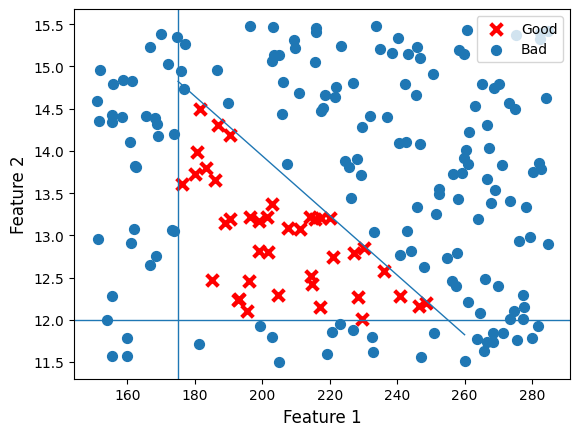

In [13]:
rng = np.random.default_rng(0)
X = rng.random(400).reshape(-1, 2)
X[:, 1] = X[:, 1] * 4 + 11.5
X[:, 0] = X[:, 0] * (285-150) + 150
Y = np.zeros(len(X))

i = 0
for t, d in X:
    y = -3/(260-175)*t + 21
    if (t > 180 and t < 260 and d > 12 and d < 15 and d <= y):
        Y[i] = 1
    else:
        Y[i] = 0
    i += 1

X_tstn = norm_l(X)
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

predictions_thresholded = (predictions > 0.5).astype(int).reshape(-1,)

plt.scatter(X[predictions_thresholded == 1, 0], X[predictions_thresholded == 1, 1], s=70, marker='x',
            linewidth=3,  c='red', label="Good")
plt.scatter(X[predictions_thresholded == 0, 0],
            X[predictions_thresholded == 0, 1], s=50, marker='o', label="Bad")

tr = np.linspace(175, 260, 50)
plt.plot(tr, (-3 / 85) * tr + 21, linewidth=1)
plt.axhline(y=12, linewidth=1)
plt.axvline(x=175, linewidth=1)

plt.xlabel("Feature 1", size=12)
plt.ylabel("Feature 2", size=12)
plt.legend(loc='upper right')

plt.show()